In [39]:
import tensorflow as tf
import tensorflow.keras.layers as tf_layers
import tensorflow_datasets as tf_datasets

import math
import numpy as np
import matplotlib.pyplot as plt

In [40]:
dataset, metadata = tf_datasets.load('fashion_mnist', as_supervised=True, with_info=True)
train_dataset, test_dataset = dataset['train'], dataset['test']

In [41]:
class_names = [
    'T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
    'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot'
]

In [42]:
def normalize(images, labels):
    images = tf.cast(images, tf.float32)
    images /= 255
    return images, labels

train_dataset = train_dataset.map(normalize)
test_dataset = test_dataset.map(normalize)

In [43]:
num_train_examples = metadata.splits['train'].num_examples
num_test_examples = metadata.splits['test'].num_examples

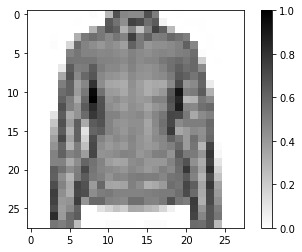

In [44]:
for image, label in test_dataset.take(1):
    break

image = image.numpy().reshape((28,28))

plt.figure()
plt.imshow(image, cmap = plt.cm.binary)
plt.colorbar()
plt.grid(False)
plt.show()

In [45]:
model = tf.keras.Sequential([
    tf_layers.Flatten(),
    tf_layers.Dense(128, activation=tf.nn.relu),
    tf_layers.Dense(10, activation=tf.nn.softmax)
])

In [46]:
model.compile(optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [47]:
BATCH_SIZE = 32
train_dataset = train_dataset.repeat().shuffle(num_train_examples).batch(BATCH_SIZE)

In [48]:
test_dataset = test_dataset.batch(BATCH_SIZE)

In [52]:
model.fit(train_dataset, epochs=5, steps_per_epoch=math.ceil(num_train_examples/BATCH_SIZE))

Epoch 1/5
1875/1875 [==============================] - 12s 5ms/step - loss: 0.2578 - accuracy: 0.9041
Epoch 2/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2485 - accuracy: 0.9074
Epoch 3/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2374 - accuracy: 0.9118
Epoch 4/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2328 - accuracy: 0.9126
Epoch 5/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2235 - accuracy: 0.9173


In [54]:
test_loss, test_accuracy = model.evaluate(test_dataset, steps=math.ceil(num_test_examples/BATCH_SIZE))
print(f'Accuracy on test dataset: {test_accuracy}')

313/313 [==============================] - 1s 2ms/step - loss: 0.3374 - accuracy: 0.8833
Accuracy on test dataset: 0.8833000063896179


In [55]:
for test_images, test_labels in test_dataset.take(1):
    test_images = test_images.numpy()
    test_labels = test_labels.numpy()
    predictions = model.predict(test_images)

In [56]:
predictions.shape

(32, 10)

In [57]:
predictions[0]

array([2.0155261e-05, 4.6429770e-07, 5.8384067e-03, 1.1361379e-06,
       9.7055489e-01, 3.1602418e-12, 2.3583764e-02, 1.0388127e-09,
       1.1054547e-06, 2.1649629e-10], dtype=float32)

In [58]:
np.argmax(predictions[0])

4

In [59]:
test_labels[0]

4

In [62]:
def plot_images(i, predictions_array, true_labels, images):
    predictions_array, true_label, img = predictions_array[i], true_labels[i], images[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    
    plt.imshow(img[...,0], cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)

    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel(f'{class_names[predicted_label]} {100*np.max(predictions_array):2.0f}% ({class_names[true_label]})', color=color)

def plot_value_array(i, predictions_array, true_label):
    predictions_array,  true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color='#777777')
    plt.ylim([0,1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

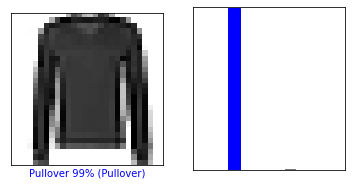

In [64]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_images(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions, test_labels)